In [ ]:
# import all dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:

def data_preprocessing_pipeline(data):
    #Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    #Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    #Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])

    #Normalize numeric features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numeric_features])
    data[numeric_features] = scaler.transform(data[numeric_features])

    #Handle missing values in categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    return data


In [ ]:
data_df = pd.read_csv('/content/Data.csv')

In [ ]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
data_df.shape

(10, 4)

In [ ]:
data_df.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


two null values are there

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [ ]:
data_df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
data_preprocessing_pipeline(data_df)

,Country,Age,Salary,Purchased
0,France,0.758874,7.494733e-01,No
1,Spain,-1.711504,-1.438178e+00,Yes
2,Germany,-1.275555,-8.912655e-01,No
3,Spain,-0.113024,-2.532004e-01,No
4,Germany,0.177609,6.632192e-16,Yes
5,France,-0.548973,-5.266569e-01,Yes
6,Spain,0.000000,-1.073570e+00,No
7,France,1.340140,1.387538e+00,Yes
8,Germany,1.630773,1.752147e+00,No
9,France,-0.258340,2.937125e-01,Yes


Initial data:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
Imputed data:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
Scaled data:
[[ 0.35451684 -0.58505976  0.55777524  0.02224751]
 [-0.13307079  1.65083742 -1.16139502 -1.17911778]
 [ 2.30486738 -1.0322392   1.8185001   1.49058286]
 [ 0.23261993 -0.36147005  0.44316389  0.4227026 ]
 [ 1.2077952  -0.58505976  0.61508092  0.28921757]]
PCA-transformed data:
[[ 0.67946575 -0.38500577]
 [-1.85948524  1.36754843]
 [ 3.37418698  0.08283354]
 [ 0.71543345 -0.20586539]
 [ 1.30528623 -0.03401018]]


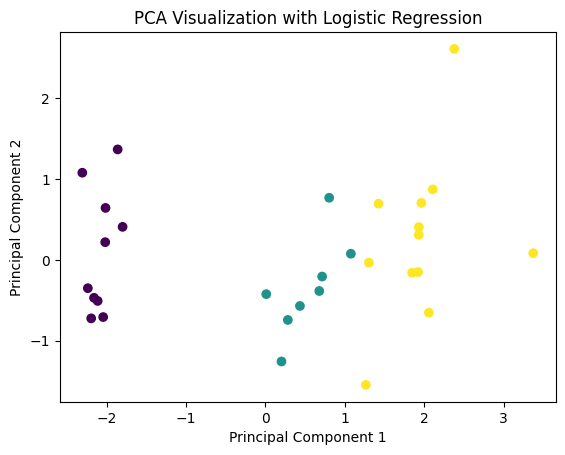

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the initial data
print("Initial data:")
print(X_test[:5])

# Create a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression())
])

# Fit and predict using the pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Transform and print results of preprocessing steps
X_imputed = pipeline.named_steps['imputer'].transform(X_test)
X_scaled = pipeline.named_steps['scaler'].transform(X_imputed)
X_pca = pipeline.named_steps['pca'].transform(X_scaled)

print("Imputed data:")
print(X_imputed[:5])
print("Scaled data:")
print(X_scaled[:5])
print("PCA-transformed data:")
print(X_pca[:5])

# Visualize the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Logistic Regression')
plt.show()